In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('/home/matt/readout/host/')
import ali_offline_demod as dm
import imp
imp.reload(dm)
import glob
import pickle
from scipy import spatial

/tmp/ipykernel_2649/419398803.py:6: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [10]:
#ASU numbering
#south line
GHz150_lines = [11,12,8,7] 
GHz95_lines = [10,9] 

['./20240213_results_4750MHz_BL8_Warm.pkl', './20240213_results_4250MHz_BL11_Cold.pkl', './20240213_results_4250MHz_BL10_Cold.pkl', './20240213_results_4750MHz_BL7_Cold.pkl', './20240213_results_6750MHz_BL12_Warm.pkl', './20240213_results_5250MHz_BL9_Cold.pkl', './20240213_results_4750MHz_BL7_Warm.pkl', './20240213_results_5750MHz_BL8_Warm.pkl', './20240213_results_6250MHz_BL8_Warm.pkl', './20240213_results_4250MHz_BL11_Warm.pkl', './20240213_results_6750MHz_BL12_Cold.pkl', './20240213_results_5750MHz_BL11_Cold.pkl', './20240213_results_4750MHz_BL9_Warm.pkl', './20240213_results_5250MHz_BL12_Warm.pkl', './20240213_results_4750MHz_BL9_Cold.pkl', './20240213_results_5750MHz_BL8_Cold.pkl', './20240213_results_4750MHz_BL8_Cold.pkl', './20240213_results_5250MHz_BL12_Cold.pkl', './20240213_results_6250MHz_BL8_Cold.pkl', './20240213_results_4250MHz_BL10_Warm.pkl', './20240213_results_4250MHz_BL9_Cold.pkl', './20240213_results_4750MHz_BL11_Cold.pkl', './20240213_results_5250MHz_BL7_Warm.pkl', 

/tmp/ipykernel_2649/463099331.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


./20240213_results_4750MHz_BL9_Cold.pkl
Cold 9
./20240213_results_5750MHz_BL8_Cold.pkl
Cold 8
./20240213_results_4750MHz_BL8_Cold.pkl
Cold 8
./20240213_results_5250MHz_BL12_Cold.pkl
Cold 12
./20240213_results_6250MHz_BL8_Cold.pkl
Cold 8
./20240213_results_4250MHz_BL10_Warm.pkl
Warm 10
./20240213_results_4250MHz_BL9_Cold.pkl
Cold 9
./20240213_results_4750MHz_BL11_Cold.pkl
Cold 11
./20240213_results_5250MHz_BL7_Warm.pkl
Warm 7
./20240213_results_5750MHz_BL11_Warm.pkl
Warm 11
./20240213_results_5250MHz_BL9_Warm.pkl
Warm 9
./20240213_results_4250MHz_BL9_Warm.pkl
Warm 9
./20240213_results_4750MHz_BL11_Warm.pkl
Warm 11
./20240213_results_5250MHz_BL7_Cold.pkl
Cold 7


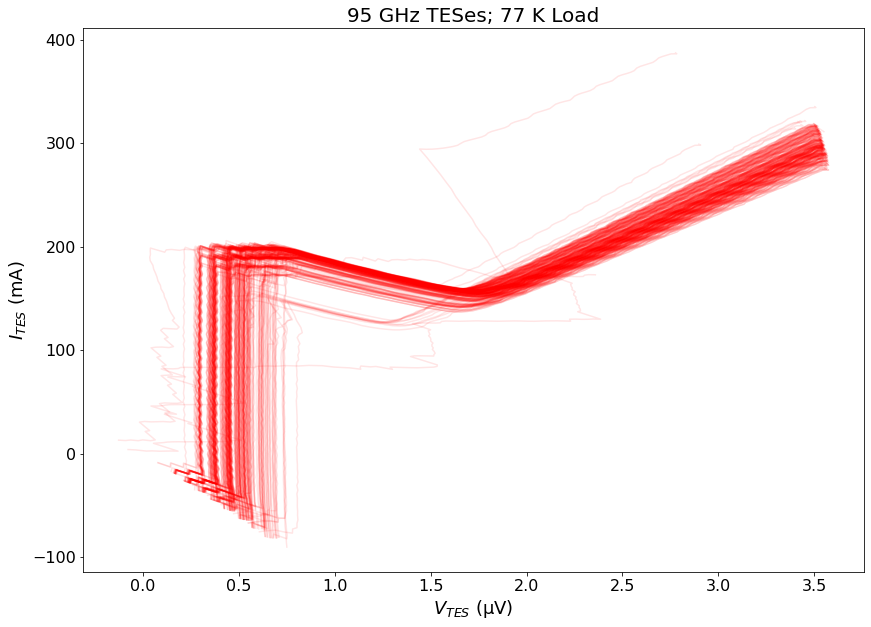

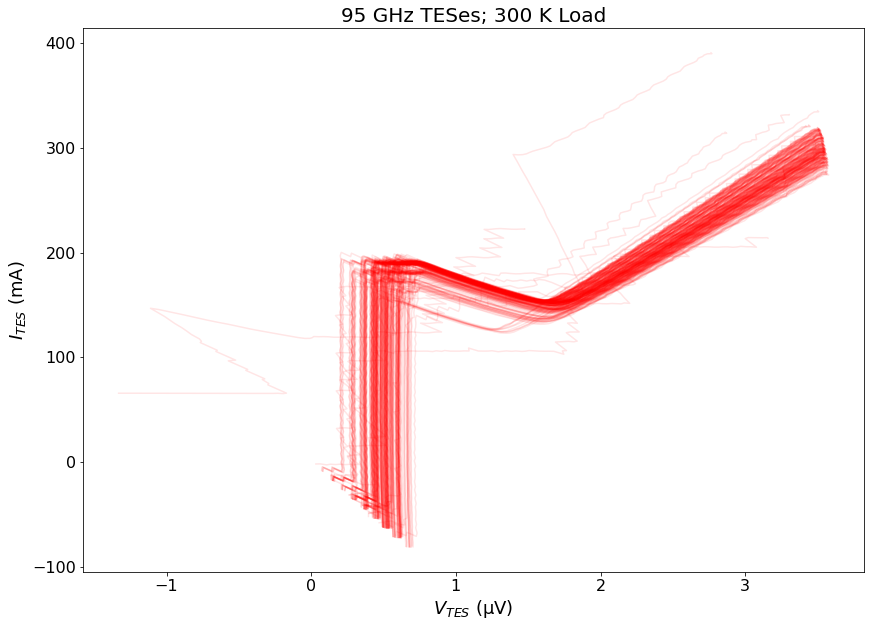

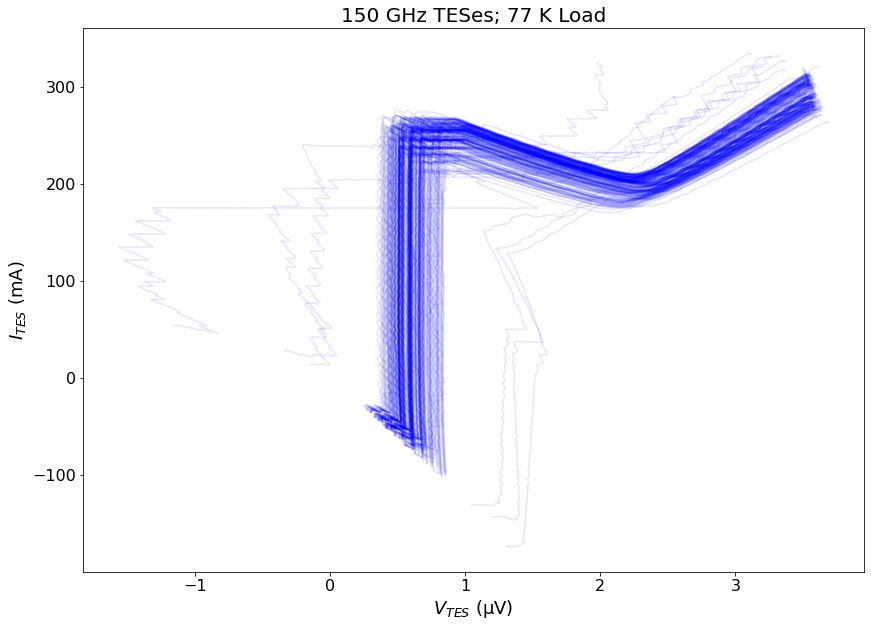

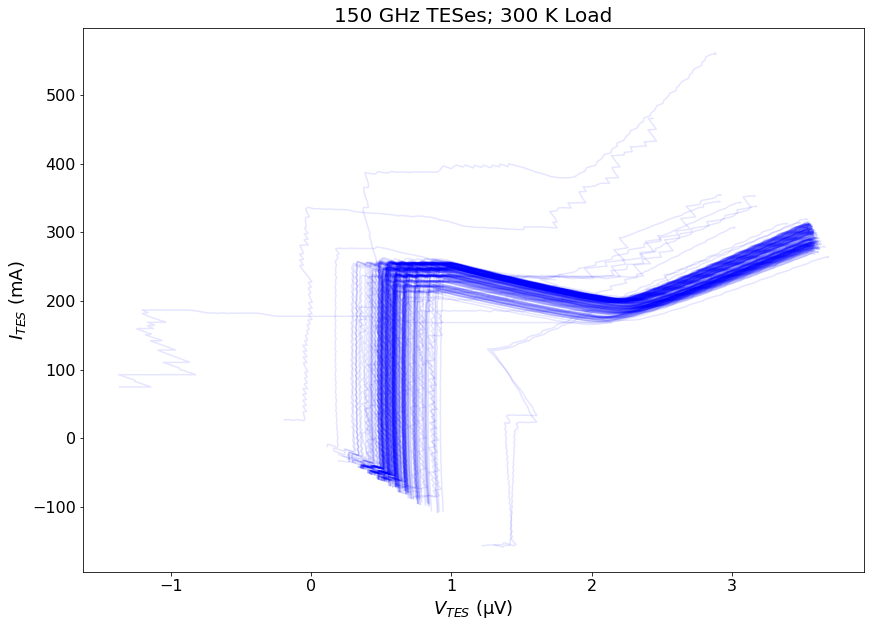

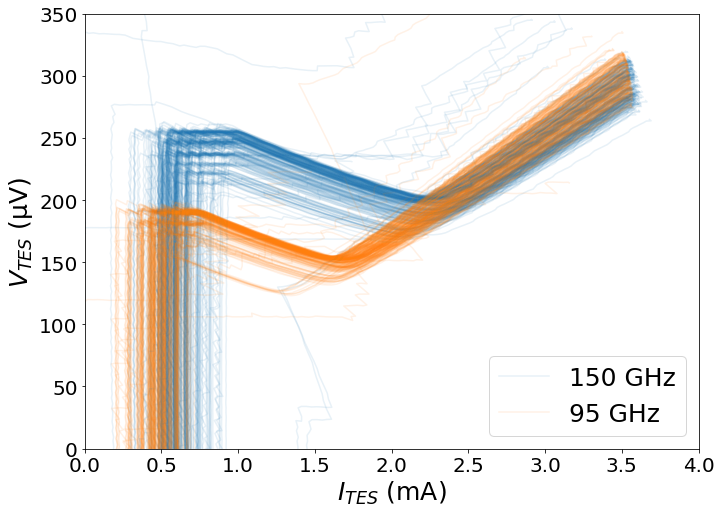

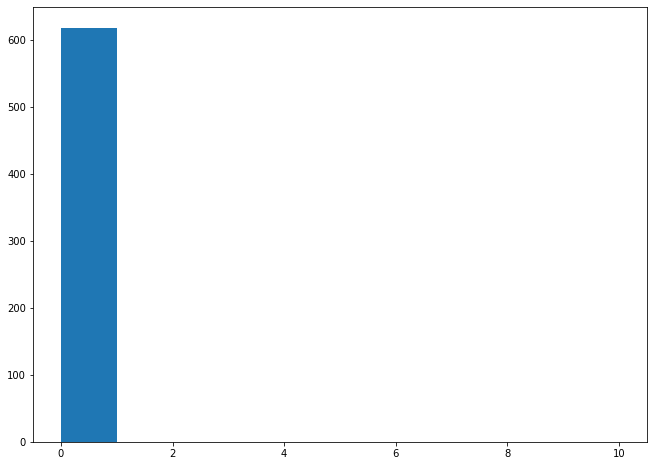

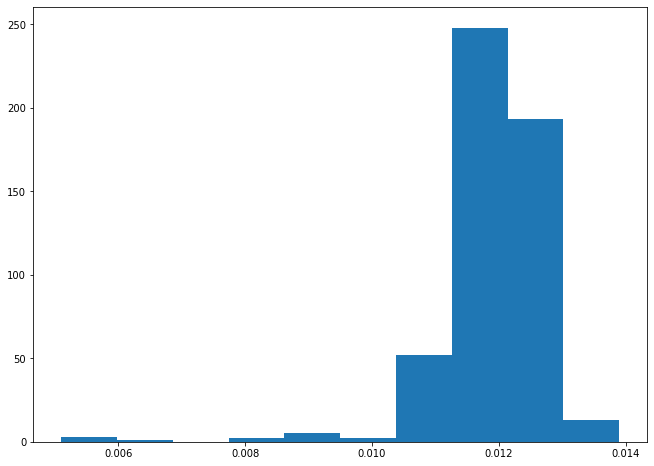

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [27]:
data_directory = 'name_of_directory' #it knows the parent directory, so you just need the 
                                     #specific directory name

datafiles = glob.glob('./[!bias][!iColdload]*')
print(datafiles)

fig_95_Cold, ax_95_Cold = plt.subplots(1, figsize=(14, 10))
fig_95_Warm, ax_95_Warm = plt.subplots(1, figsize=(14, 10))
fig_150_Cold, ax_150_Cold = plt.subplots(1, figsize=(14, 10))
fig_150_Warm, ax_150_Warm = plt.subplots(1, figsize=(14, 10))
fig_combined_warm, ax_combined_warm = plt.subplots(1, figsize=(11,8))

fig_Warm_AlMn, ax_Warm_AlMn = plt.subplots(1, figsize=(11,8))
fig_Warm_Al, ax_Warm_Al = plt.subplots(1, figsize=(11,8))

Rn_AlMn = np.array([])
Rn_Al = np.array([])
entry_count_150 = 0
entry_count_95 = 0

for pickle_i in datafiles:
    plt.figure()
    print(pickle_i)
    temp = pickle_i.split('_')[-1].split('.')[0]
    ASU_BL = int(pickle_i.split('_')[-2].split('L')[1])
    
    print(temp, ASU_BL)
    
    with open(pickle_i, 'rb') as f:
        data_i = pickle.load(f) 
    
    if temp == "Cold" and np.in1d(ASU_BL, GHz150_lines)[0]:
        for ch in range(len(data_i['Vtes'])):
            ax_150_Cold.plot(data_i['Vtes'][ch],data_i['Ites'][ch],'b',alpha=0.1)
            
    elif temp == "Warm" and np.in1d(ASU_BL, GHz150_lines)[0]:
        for ch in range(len(data_i['Vtes'])):
            ax_150_Warm.plot(data_i['Vtes'][ch],data_i['Ites'][ch],'b',alpha=0.1)
            Rn_AlMn = np.append(Rn_AlMn, data_i['Rn AlMn'][ch])
            Rn_Al = np.append(Rn_Al, data_i['Rn Al'][ch])
            if entry_count_150 == 0:
                ax_combined_warm.plot(data_i['Vtes'][ch],data_i['Ites'][ch],'tab:blue',alpha=0.1,label='150 GHz')
                entry_count_150 += 1
            else:
                ax_combined_warm.plot(data_i['Vtes'][ch],data_i['Ites'][ch],'tab:blue',alpha=0.1)
            
    elif temp == "Cold" and np.in1d(ASU_BL, GHz95_lines)[0]:
        for ch in range(len(data_i['Vtes'])):
            ax_95_Cold.plot(data_i['Vtes'][ch],data_i['Ites'][ch],'r',alpha=0.1)
            
    elif temp == "Warm" and np.in1d(ASU_BL, GHz95_lines)[0]:
        for ch in range(len(data_i['Vtes'])):
            ax_95_Warm.plot(data_i['Vtes'][ch],data_i['Ites'][ch],'r',alpha=0.1)
            Rn_AlMn = np.append(Rn_AlMn, data_i['Rn AlMn'][ch])
            Rn_Al = np.append(Rn_Al, data_i['Rn Al'][ch])
            if entry_count_95 == 0:
                ax_combined_warm.plot(data_i['Vtes'][ch],data_i['Ites'][ch],'tab:orange',alpha=0.1,label='95 GHz')
                entry_count_95 +=1
            else:
                ax_combined_warm.plot(data_i['Vtes'][ch],data_i['Ites'][ch],'tab:orange',alpha=0.1)
                
            
ax_95_Cold.set_title('95 GHz TESes; 77 K Load',fontsize=20)
ax_95_Cold.set_ylabel('$I_{TES}$ (mA)',fontsize=18)
ax_95_Cold.set_xlabel('$V_{TES}$ (μV)',fontsize=18)
ax_95_Cold.tick_params(axis='both', which='major', labelsize=16)

ax_95_Warm.set_title('95 GHz TESes; 300 K Load',fontsize=20)
ax_95_Warm.set_ylabel('$I_{TES}$ (mA)',fontsize=18)
ax_95_Warm.set_xlabel('$V_{TES}$ (μV)',fontsize=18)
ax_95_Warm.tick_params(axis='both', which='major', labelsize=16)

ax_150_Cold.set_title('150 GHz TESes; 77 K Load',fontsize=20)
ax_150_Cold.set_ylabel('$I_{TES}$ (mA)',fontsize=18)
ax_150_Cold.set_xlabel('$V_{TES}$ (μV)',fontsize=18)
ax_150_Cold.tick_params(axis='both', which='major', labelsize=16)

ax_150_Warm.set_title('150 GHz TESes; 300 K Load',fontsize=20)
ax_150_Warm.set_ylabel('$I_{TES}$ (mA)',fontsize=18)
ax_150_Warm.set_xlabel('$V_{TES}$ (μV)',fontsize=18)
ax_150_Warm.tick_params(axis='both', which='major', labelsize=16)

ax_Warm_AlMn.hist(Rn_AlMn,bins=10,range=(0,10))
ax_Warm_Al.hist(Rn_Al)

ax_combined_warm.set_xlabel('$I_{TES}$ (mA)',fontsize=25)
ax_combined_warm.set_ylabel('$V_{TES}$ (μV)',fontsize=25)
ax_combined_warm.tick_params(axis='both', which='major', labelsize=20)
ax_combined_warm.legend(fontsize=25)
ax_combined_warm.set_ylim([0,350])
ax_combined_warm.set_xlim([0,4])
fig_combined_warm.savefig('../SPIE_2024_Figures/Combined_IV.png',dpi=150)






['./20240213_results_4750MHz_BL8_Warm.pkl', './20240213_results_4250MHz_BL11_Cold.pkl', './20240213_results_4250MHz_BL10_Cold.pkl', './20240213_results_4750MHz_BL7_Cold.pkl', './20240213_results_6750MHz_BL12_Warm.pkl', './20240213_results_5250MHz_BL9_Cold.pkl', './20240213_results_4750MHz_BL7_Warm.pkl', './20240213_results_5750MHz_BL8_Warm.pkl', './20240213_results_6250MHz_BL8_Warm.pkl', './20240213_results_4250MHz_BL11_Warm.pkl', './20240213_results_6750MHz_BL12_Cold.pkl', './20240213_results_5750MHz_BL11_Cold.pkl', './20240213_results_4750MHz_BL9_Warm.pkl', './20240213_results_5250MHz_BL12_Warm.pkl', './20240213_results_4750MHz_BL9_Cold.pkl', './20240213_results_5750MHz_BL8_Cold.pkl', './20240213_results_4750MHz_BL8_Cold.pkl', './20240213_results_5250MHz_BL12_Cold.pkl', './20240213_results_6250MHz_BL8_Cold.pkl', './20240213_results_4250MHz_BL10_Warm.pkl', './20240213_results_4250MHz_BL9_Cold.pkl', './20240213_results_4750MHz_BL11_Cold.pkl', './20240213_results_5250MHz_BL7_Warm.pkl', 

/tmp/ipykernel_2649/2251850271.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


./20240213_results_5750MHz_BL8_Cold.pkl
Cold 8
./20240213_results_4750MHz_BL8_Cold.pkl
Cold 8
./20240213_results_5250MHz_BL12_Cold.pkl
Cold 12
./20240213_results_6250MHz_BL8_Cold.pkl
Cold 8
./20240213_results_4250MHz_BL10_Warm.pkl
Warm 10
./20240213_results_4250MHz_BL9_Cold.pkl
Cold 9
./20240213_results_4750MHz_BL11_Cold.pkl
Cold 11
./20240213_results_5250MHz_BL7_Warm.pkl
Warm 7
./20240213_results_5750MHz_BL11_Warm.pkl
Warm 11
./20240213_results_5250MHz_BL9_Warm.pkl
Warm 9
./20240213_results_4250MHz_BL9_Warm.pkl
Warm 9
./20240213_results_4750MHz_BL11_Warm.pkl
Warm 11
./20240213_results_5250MHz_BL7_Cold.pkl
Cold 7


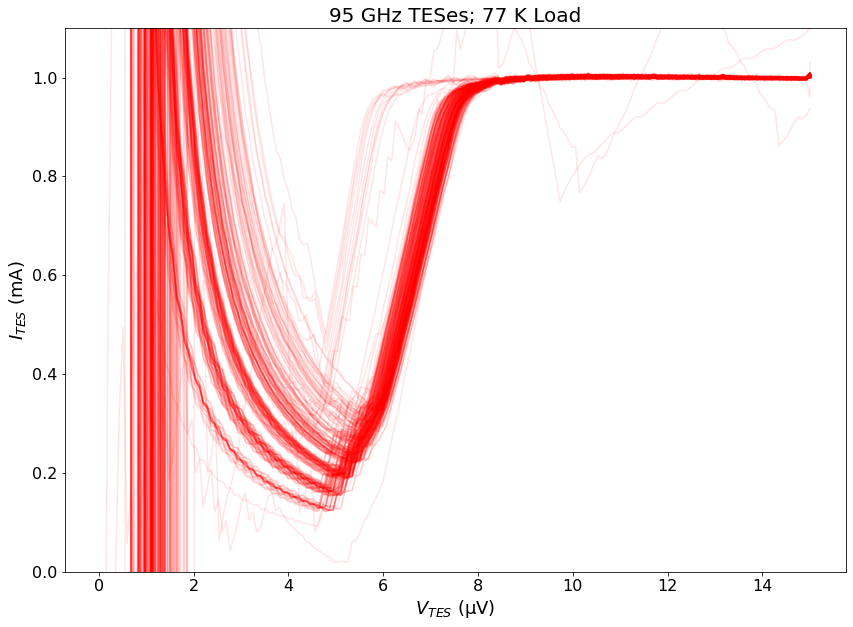

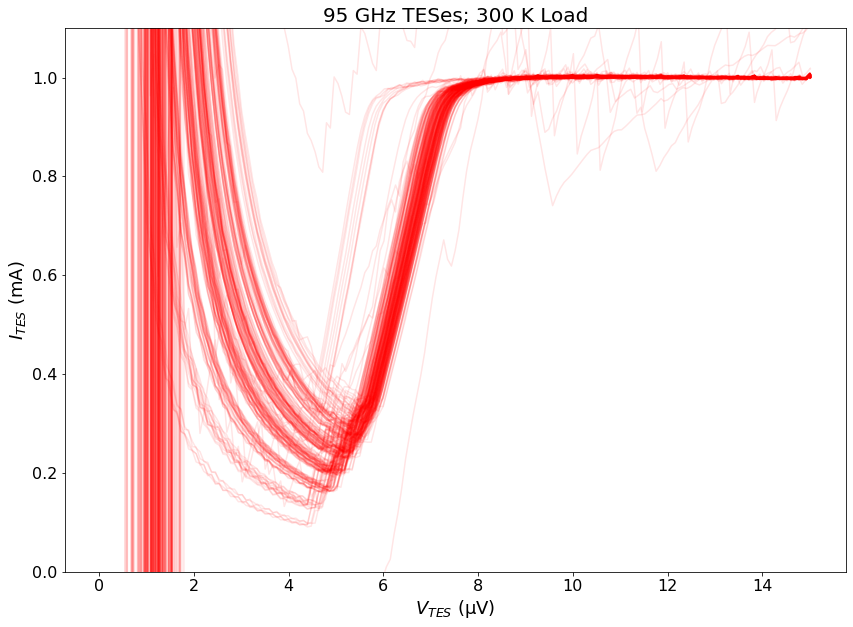

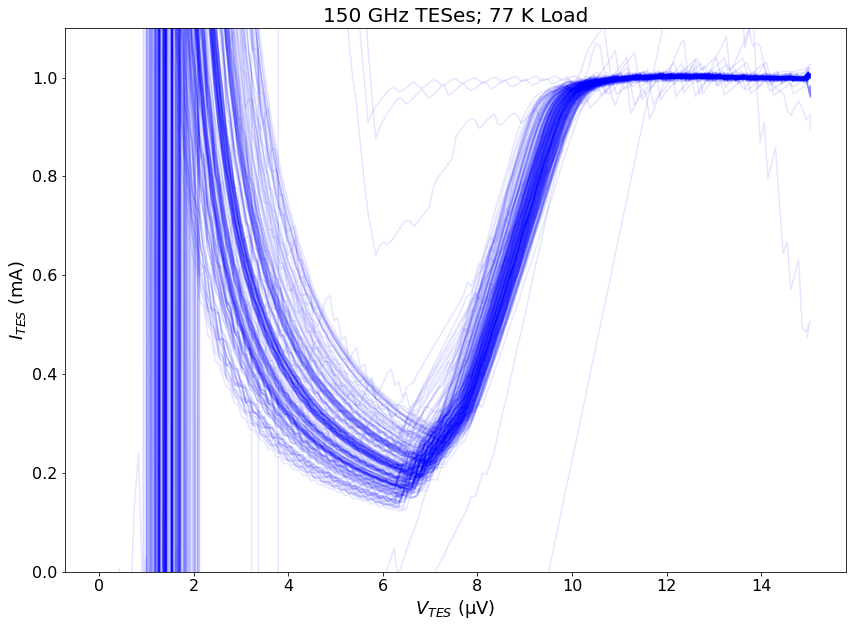

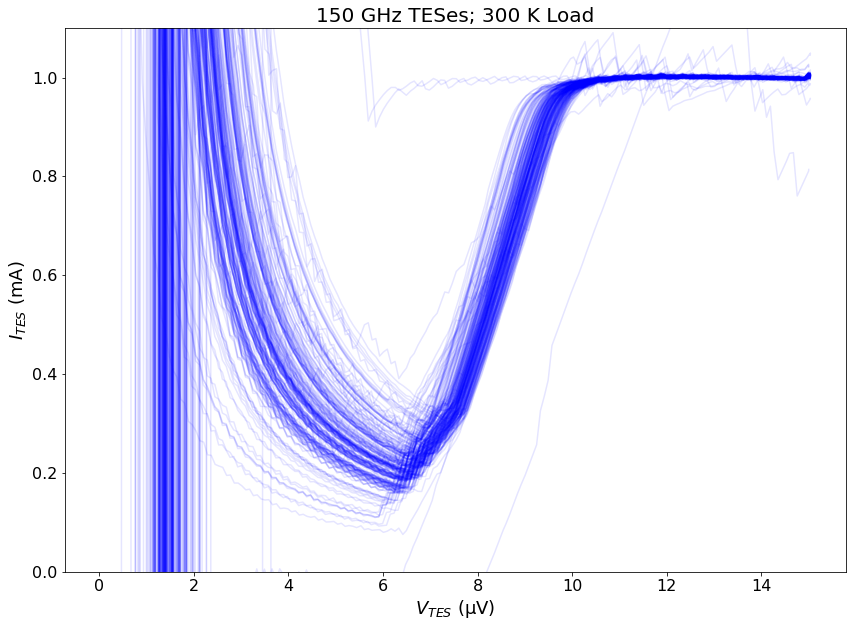

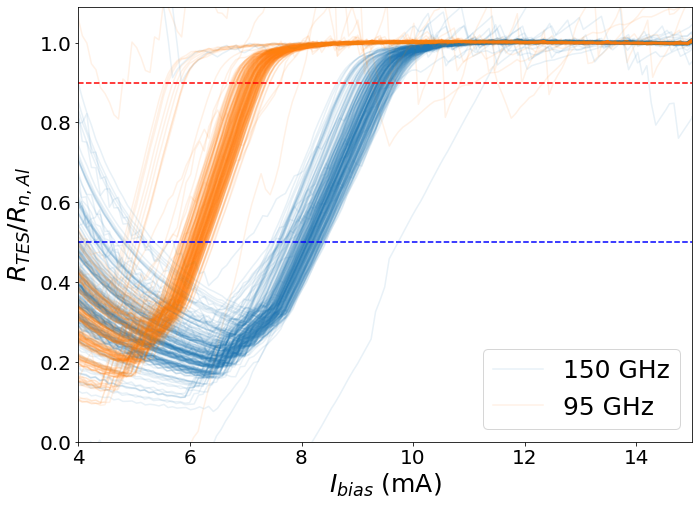

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [36]:

data_directory = 'name_of_directory' #it knows the parent directory, so you just need the 
                                     #specific directory name

datafiles = glob.glob('./[!testing][!bias][!ipynb][!Coldload]*')
print(datafiles)

fig_95_Cold, ax_95_Cold = plt.subplots(1, figsize=(14, 10))
fig_95_Warm, ax_95_Warm = plt.subplots(1, figsize=(14, 10))
fig_150_Cold, ax_150_Cold = plt.subplots(1, figsize=(14, 10))
fig_150_Warm, ax_150_Warm = plt.subplots(1, figsize=(14, 10))
fig_combined_warm, ax_combined_warm = plt.subplots(1, figsize=(11,8))

entry_count_150 = 0
entry_count_95 = 0
    
for pickle_i in datafiles:
    plt.figure()
    print(pickle_i)
    temp = pickle_i.split('_')[-1].split('.')[0]
    ASU_BL = int(pickle_i.split('_')[-2].split('L')[1])
    
    print(temp, ASU_BL)
    
    with open(pickle_i, 'rb') as f:
        data_i = pickle.load(f) 
    
    if temp == "Cold" and np.in1d(ASU_BL, GHz150_lines)[0]:
        for ch in range(len(data_i['Vtes'])):
            ax_150_Cold.plot(data_i['Ibias'],data_i['bps'][ch],'b',alpha=0.1)
            
    elif temp == "Warm" and np.in1d(ASU_BL, GHz150_lines)[0]:
        for ch in range(len(data_i['Vtes'])):
            ax_150_Warm.plot(data_i['Ibias'],data_i['bps'][ch],'b',alpha=0.1)
            if entry_count_150 == 0:
                ax_combined_warm.plot(data_i['Ibias'],data_i['bps'][ch],'tab:blue',alpha=0.1,label='150 GHz')
                entry_count_150 += 1
            else:
                ax_combined_warm.plot(data_i['Ibias'],data_i['bps'][ch],'tab:blue',alpha=0.1)
            
    elif temp == "Cold" and np.in1d(ASU_BL, GHz95_lines)[0]:
        for ch in range(len(data_i['Vtes'])):
            ax_95_Cold.plot(data_i['Ibias'],data_i['bps'][ch],'r',alpha=0.1)
            
    elif temp == "Warm" and np.in1d(ASU_BL, GHz95_lines)[0]:
        for ch in range(len(data_i['Vtes'])):
            ax_95_Warm.plot(data_i['Ibias'],data_i['bps'][ch],'r',alpha=0.1)
            if entry_count_95 == 0:
                ax_combined_warm.plot(data_i['Ibias'],data_i['bps'][ch],'tab:orange',alpha=0.1,label='95 GHz')
                entry_count_95 +=1
            else:
                ax_combined_warm.plot(data_i['Ibias'],data_i['bps'][ch],'tab:orange',alpha=0.1)
                
ax_combined_warm.hlines(0.5,4,15,color='blue',linestyle='dashed')
ax_combined_warm.hlines(0.9,4,15,color='red',linestyle='dashed')
            
ax_95_Cold.set_title('95 GHz TESes; 77 K Load',fontsize=20)
ax_95_Cold.set_ylabel('$I_{TES}$ (mA)',fontsize=18)
ax_95_Cold.set_xlabel('$V_{TES}$ (μV)',fontsize=18)
ax_95_Cold.tick_params(axis='both', which='major', labelsize=16)
ax_95_Cold.set_ylim([0,1.1])

ax_95_Warm.set_title('95 GHz TESes; 300 K Load',fontsize=20)
ax_95_Warm.set_ylabel('$I_{TES}$ (mA)',fontsize=18)
ax_95_Warm.set_xlabel('$V_{TES}$ (μV)',fontsize=18)
ax_95_Warm.tick_params(axis='both', which='major', labelsize=16)
ax_95_Warm.set_ylim([0,1.1])

ax_150_Cold.set_title('150 GHz TESes; 77 K Load',fontsize=20)
ax_150_Cold.set_ylabel('$I_{TES}$ (mA)',fontsize=18)
ax_150_Cold.set_xlabel('$V_{TES}$ (μV)',fontsize=18)
ax_150_Cold.tick_params(axis='both', which='major', labelsize=16)
ax_150_Cold.set_ylim([0,1.1])

ax_150_Warm.set_title('150 GHz TESes; 300 K Load',fontsize=20)
ax_150_Warm.set_ylabel('$I_{TES}$ (mA)',fontsize=18)
ax_150_Warm.set_xlabel('$V_{TES}$ (μV)',fontsize=18)
ax_150_Warm.tick_params(axis='both', which='major', labelsize=16)
ax_150_Warm.set_ylim([0,1.1])

ax_combined_warm.set_xlabel('$I_{bias}$ (mA)',fontsize=25)
ax_combined_warm.set_ylabel('$R_{TES} / R_{n,Al}$',fontsize=25)
ax_combined_warm.tick_params(axis='both', which='major', labelsize=20)
ax_combined_warm.legend(fontsize=25)
ax_combined_warm.set_ylim([0,1.09])
ax_combined_warm.set_xlim([4,15])
fig_combined_warm.savefig('../SPIE_2024_Figures/Combined_RI.png',dpi=150)

In [10]:
for i,pickle_i in enumerate(datafiles):
    print(pickle_i)
    temp = pickle_i.split('_')[-1].split('.')[0]
    ASU_BL = int(pickle_i.split('_')[-2].split('L')[1])
    print (ASU_BL, i)

./20240213_results_4750MHz_BL8_Warm.pkl
8 0
./20240213_results_4250MHz_BL11_Cold.pkl
11 1
./20240213_results_4250MHz_BL10_Cold.pkl
10 2
./20240213_results_4750MHz_BL7_Cold.pkl
7 3
./20240213_results_6750MHz_BL12_Warm.pkl
12 4
./20240213_results_5250MHz_BL9_Cold.pkl
9 5
./20240213_results_4750MHz_BL7_Warm.pkl
7 6
./20240213_results_5750MHz_BL8_Warm.pkl
8 7
./20240213_results_6250MHz_BL8_Warm.pkl
8 8
./20240213_results_4250MHz_BL11_Warm.pkl
11 9
./20240213_results_6750MHz_BL12_Cold.pkl
12 10
./20240213_results_5750MHz_BL11_Cold.pkl
11 11
./20240213_results_4750MHz_BL9_Warm.pkl
9 12
./20240213_results_5250MHz_BL12_Warm.pkl
12 13
./20240213_results_4750MHz_BL9_Cold.pkl
9 14
./20240213_results_5750MHz_BL8_Cold.pkl
8 15
./20240213_results_4750MHz_BL8_Cold.pkl
8 16
./20240213_results_5250MHz_BL12_Cold.pkl
12 17
./20240213_results_6250MHz_BL8_Cold.pkl
8 18
./20240213_results_4250MHz_BL10_Warm.pkl
10 19
./20240213_results_4250MHz_BL9_Cold.pkl
9 20
./20240213_results_4750MHz_BL11_Cold.pkl
11 21


In [11]:
with open(datafiles[0], 'rb') as f:
        data_0 = pickle.load(f) 
with open(datafiles[16], 'rb') as f:
        data_16 = pickle.load(f) 


In [12]:
freq0=data_0['time series data']['channel freqs']
freq16=data_16['time series data']['channel freqs']

In [13]:
freq0_ind=np.vstack((freq0,np.arange(freq0.shape[0])))
freq0_ind=np.vstack((freq0_ind,np.zeros(freq0.shape[0])))
freq16_ind=np.vstack((freq16,np.arange(freq16.shape[0])))
freq16_ind=np.vstack((freq16_ind,np.ones(freq16.shape[0])))
freqs_all=np.vstack((freq0_ind.T,freq16_ind.T))

In [14]:
tree = spatial.cKDTree(freqs_all[:,0:1])
idups_raw=tree.query_ball_tree(tree,1e5)
idups_ids=[freqs_all[x,1].astype(int) for x in idups_raw]

/tmp/ipykernel_7856/803759362.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  tree = spatial.cKDTree(freqs_all[:,0:1])
/tmp/ipykernel_7856/803759362.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  idups_ids=[freqs_all[x,1].astype(int) for x in idups_raw]


In [15]:
idups_ids

[array([0]),
 array([1, 0]),
 array([2, 1]),
 array([3, 2]),
 array([4, 3]),
 array([5, 4]),
 array([6, 5]),
 array([7, 6]),
 array([8, 7]),
 array([9, 8]),
 array([10,  9]),
 array([11, 10]),
 array([12, 11]),
 array([13, 12]),
 array([14, 13]),
 array([15, 14]),
 array([16, 15]),
 array([17, 16]),
 array([18, 17]),
 array([19, 18]),
 array([20, 19]),
 array([21, 20]),
 array([22, 21]),
 array([23, 22]),
 array([24, 23]),
 array([25, 24]),
 array([26, 25]),
 array([27, 26]),
 array([28, 27]),
 array([29, 28]),
 array([30, 29]),
 array([31, 30]),
 array([32, 31]),
 array([33, 32]),
 array([34, 33]),
 array([35, 34]),
 array([36, 35]),
 array([37, 36]),
 array([38, 37]),
 array([39, 38]),
 array([40, 39]),
 array([41, 40]),
 array([42, 41]),
 array([43, 42]),
 array([44, 43]),
 array([45, 44]),
 array([46, 45]),
 array([47, 46]),
 array([48, 47]),
 array([49, 48]),
 array([50, 49]),
 array([51, 50]),
 array([52, 51]),
 array([53, 52]),
 array([54, 53]),
 array([55, 54]),
 array([56, 55]

In [5]:
def match_freqs(f1,f2,dist=1e5):
    f1_ind=np.vstack((f1,np.arange(f1.shape[0])))
    f1_ind=np.vstack((f1_ind,np.ones(f1.shape[0])*0))
    f2_ind=np.vstack((f2,np.arange(f2.shape[0])))
    f2_ind=np.vstack((f2_ind,np.ones(f2.shape[0])*1))
    fall=np.vstack((f1_ind.T,f2_ind.T))
    tree = spatial.cKDTree(fall[:,0:1])
    idups_raw=tree.query_ball_tree(tree,dist)
    idups_redu=[]
    for match in idups_raw:
        if len(match)!=2: continue
        else: 
            if int(fall[match[0],2])==0 and int(fall[match[1],2])==1:
                idups_redu.append(match)
    idups_ids=[fall[x,1].astype(int) for x in idups_redu]
    return idups_ids
    
    

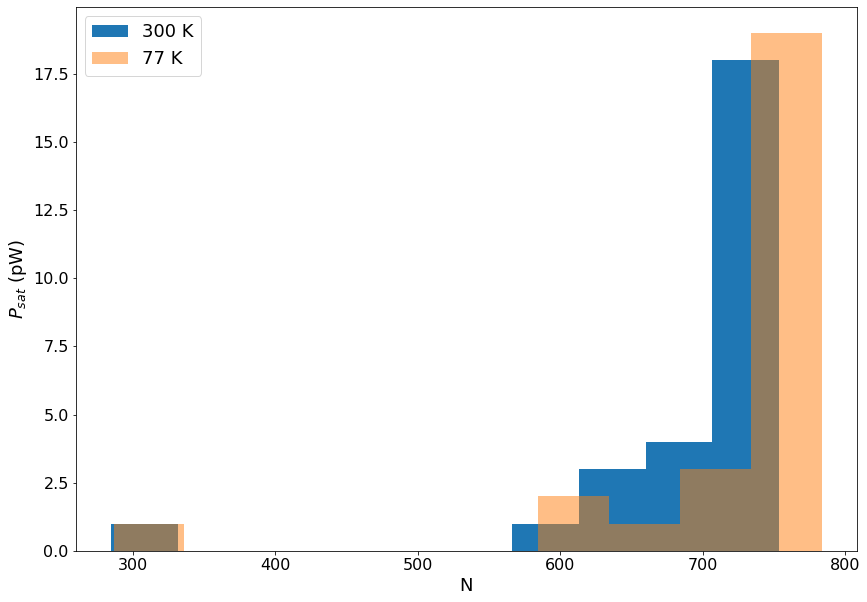

In [17]:
pbias_warm=dm.get_pbias(data_0,0.9)
pbias_cold=dm.get_pbias(data_16,0.9)

#print(data_0['bps'])
#print(data_0['bps'].shape)

#print(pbias_warm.shape)

#print(pbias_warm)
plt.figure(figsize=(14,10))
plt.hist(pbias_warm, label='300 K')
plt.hist(pbias_cold, alpha=0.5, label='77 K')
plt.xlabel('N', fontsize=18)
plt.ylabel('$P_{sat}$ (pW)', fontsize=18)
plt.legend(fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

/tmp/ipykernel_7856/63498383.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  tree = spatial.cKDTree(fall[:,0:1])
/tmp/ipykernel_7856/63498383.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  if int(fall[match[0],2])==0 and int(fall[match[1],2])==1:
/tmp/ipykernel_7856/63498383.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  idups_ids=[fall[x,1].astype(int) for x in idups_redu]


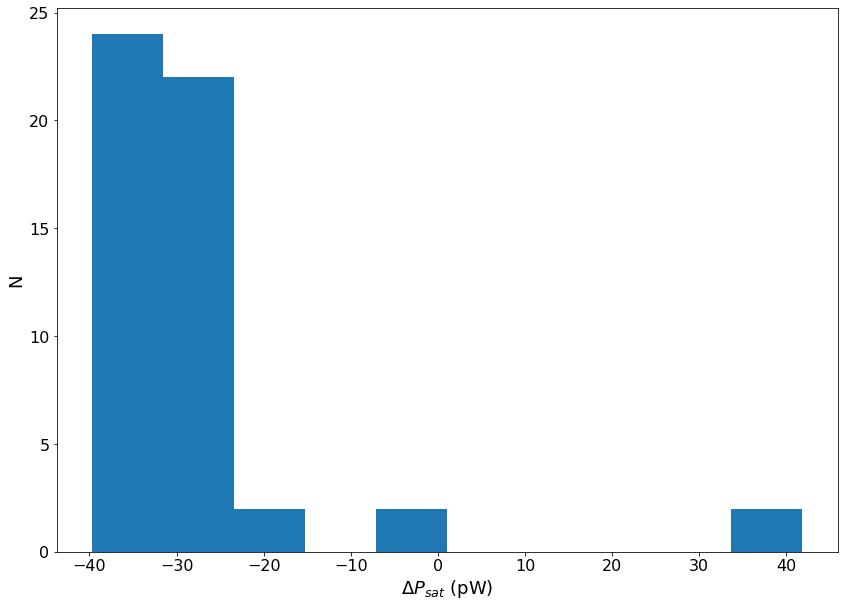

In [18]:
#print (match_freqs(freq0,freq16))

matches = match_freqs(freq0,freq16)
#print(matches)

pbias_difference = np.array([])
for match in matches:
    if ~np.isnan(pbias_warm[match[0]]) and ~np.isnan(pbias_cold[match[1]]):
        pbias_difference = np.append(pbias_difference, pbias_warm[match[0]] - pbias_cold[match[1]]) 
    
plt.figure(figsize=(14,10))   
plt.hist(pbias_difference)
plt.ylabel('N',fontsize=18)
plt.xlabel('Δ$P_{sat}$ (pW)',fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
    
    #plt.figure()
    #plt.plot(data_0['Vtes'][match[0]], data_0['Ites'][match[0]],'-')
    #plt.plot(data_16['Vtes'][match[1]], data_16['Ites'][match[1]],'-')
    

/tmp/ipykernel_7856/63498383.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  tree = spatial.cKDTree(fall[:,0:1])
/tmp/ipykernel_7856/63498383.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  if int(fall[match[0],2])==0 and int(fall[match[1],2])==1:
/tmp/ipykernel_7856/63498383.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  idups_ids=[fall[x,1].astype(int) for x in idups_redu]


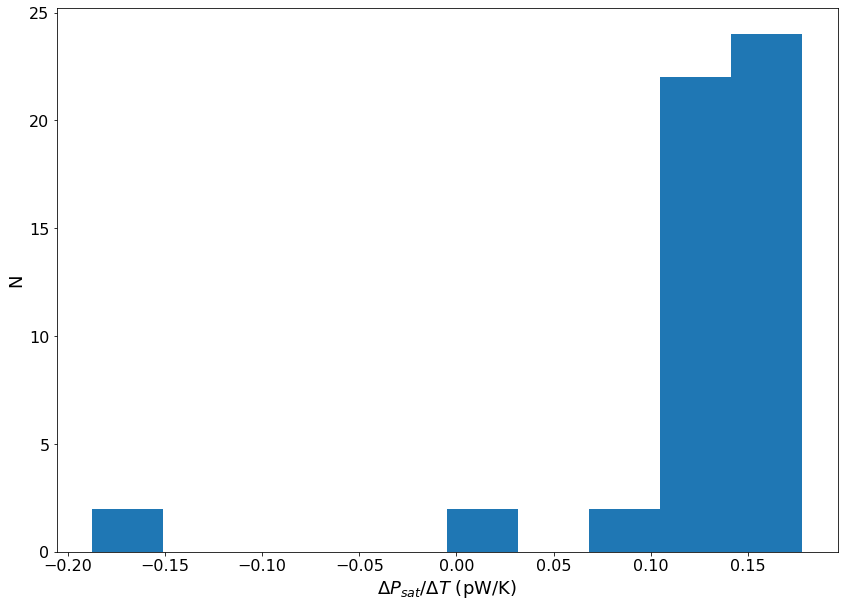

In [19]:
#print (match_freqs(freq0,freq16))
#pW/K



matches = match_freqs(freq0,freq16)
#print(matches)

delta_T = 77-300


pbias_difference = np.array([])
for match in matches:
    if ~np.isnan(pbias_warm[match[0]]) and ~np.isnan(pbias_cold[match[1]]):
        pbias_difference = np.append(pbias_difference, pbias_warm[match[0]] - pbias_cold[match[1]]) 
    
plt.figure(figsize=(14,10))   
plt.hist(pbias_difference/delta_T)
plt.ylabel('N',fontsize=18)
plt.xlabel('Δ$P_{sat}$/Δ$T$ (pW/Κ)',fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
    
    #plt.figure()
    #plt.plot(data_0['Vtes'][match[0]], data_0['Ites'][match[0]],'-')
    #plt.plot(data_16['Vtes'][match[1]], data_16['Ites'][match[1]],'-')
    

/tmp/ipykernel_7856/63498383.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  tree = spatial.cKDTree(fall[:,0:1])
/tmp/ipykernel_7856/63498383.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  if int(fall[match[0],2])==0 and int(fall[match[1],2])==1:
/tmp/ipykernel_7856/63498383.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  idups_ids=[fall[x,1].astype(int) for x in idups_redu]


0.13511132950450644
0.13511132950450644


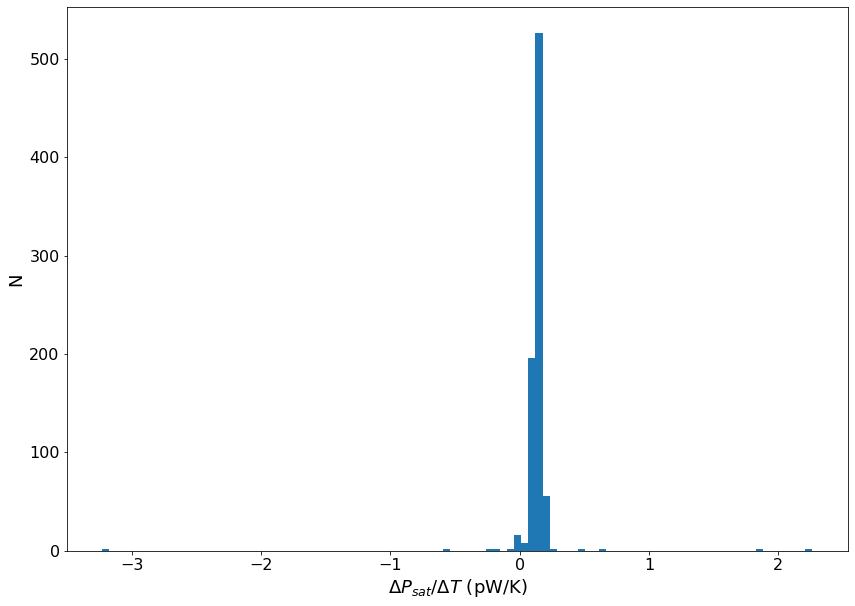

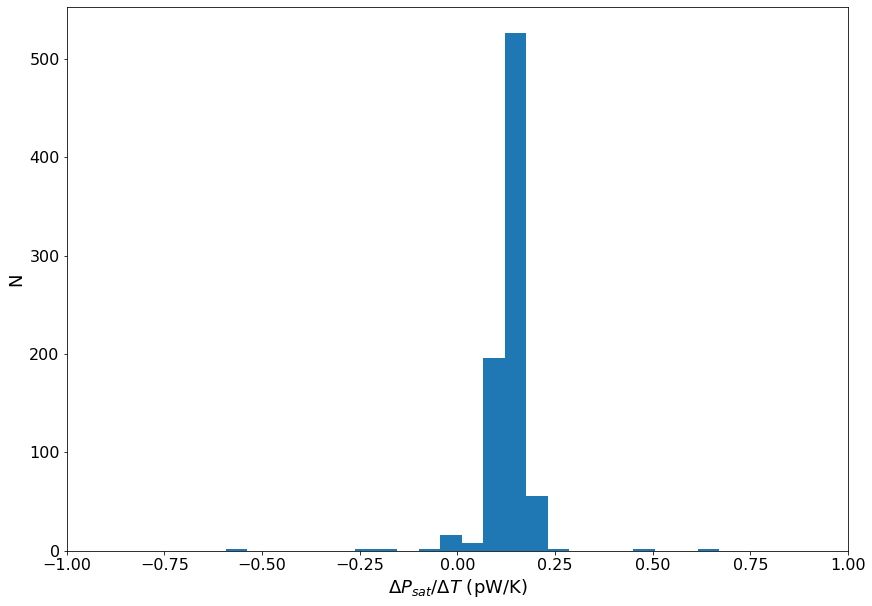

In [20]:
#pW/K full dataset

#warm_datafiles = glob.glob('./[!bias][!ipynb]*Warm*')
#cold_datafiles = glob.glob('./[!bias][!ipynb]*Cold*')

#print(cold_datafiles)

delta_T = 77-300

pbias_difference = np.array([])

for BL in [7,8,9,10,11,12]:
    for freq in [4250, 4750, 5250, 5750, 6250, 6750]:
        warm_datafile = glob.glob(f'./[!csv][!ipynb]*{freq}*{BL}*Warm*')
        cold_datafile = glob.glob(f'./[!csv][!ipynb]*{freq}*{BL}*Cold*')
        
        

        
        if len(warm_datafile) != 0 and len(cold_datafile) != 0:
            
            #print(warm_datafile)
            #print(cold_datafile)
            
            with open(warm_datafile[0], 'rb') as f:
                warm_data = pickle.load(f) 
            with open(cold_datafile[0], 'rb') as f:
                cold_data = pickle.load(f) 
             
            pbias_warm=dm.get_pbias(warm_data,0.9)
            pbias_cold=dm.get_pbias(cold_data,0.9)
            
            freq_pairs = match_freqs(warm_data['time series data']['channel freqs'],cold_data['time series data']['channel freqs'],dist=1e5)
            #print(freq_pairs)
                     
            for match in freq_pairs:
                if ~np.isnan(pbias_warm[match[0]]) and ~np.isnan(pbias_cold[match[1]]):
                    pbias_difference = np.append(pbias_difference, pbias_warm[match[0]] - pbias_cold[match[1]]) 
                    

fig_full, ax_full = plt.subplots(1, figsize=(14,10))
fig_limited, ax_limited = plt.subplots(1, figsize=(14,10))
   
ax_full.hist(pbias_difference/delta_T,bins=100)
ax_full.set_ylabel('N',fontsize=18)
ax_full.set_xlabel('Δ$P_{sat}$/Δ$T$ (pW/Κ)',fontsize=18)
ax_full.tick_params(axis='both', which='major', labelsize=16)
print(np.average(pbias_difference/delta_T))

ax_limited.hist(pbias_difference/delta_T,bins=100)
ax_limited.set_ylabel('N',fontsize=18)
ax_limited.set_xlabel('Δ$P_{sat}$/Δ$T$ (pW/Κ)',fontsize=18)
ax_limited.tick_params(axis='both', which='major', labelsize=16)
ax_limited.set_xlim([-1,1])
print(np.average(pbias_difference/delta_T))

/tmp/ipykernel_2649/63498383.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  tree = spatial.cKDTree(fall[:,0:1])
/tmp/ipykernel_2649/63498383.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  if int(fall[match[0],2])==0 and int(fall[match[1],2])==1:
/tmp/ipykernel_2649/63498383.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  idups_ids=[fall[x,1].astype(int) for x in idups_redu]


0.1647781676164493
0.1647781676164493
212
mean 150 eta: 0.23880893857456428 +- 0.28855563962339326
mean 95 eta: 0.20271534810425884 +- 0.47224526310120674
mean eta: 0.2213329665463629 +- 0.3889153586503874
411
411


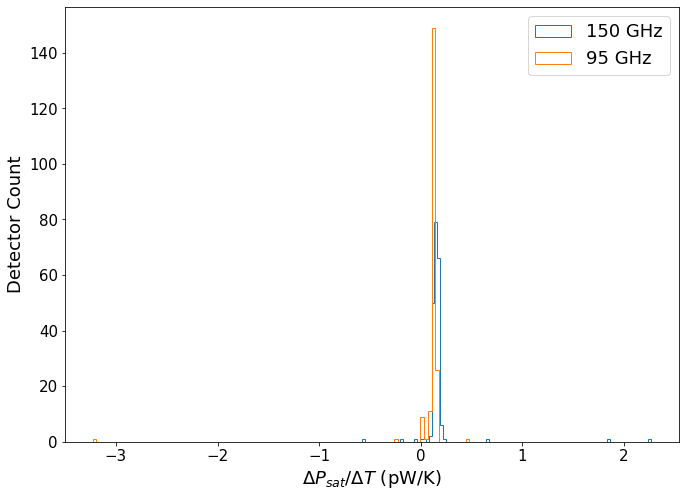

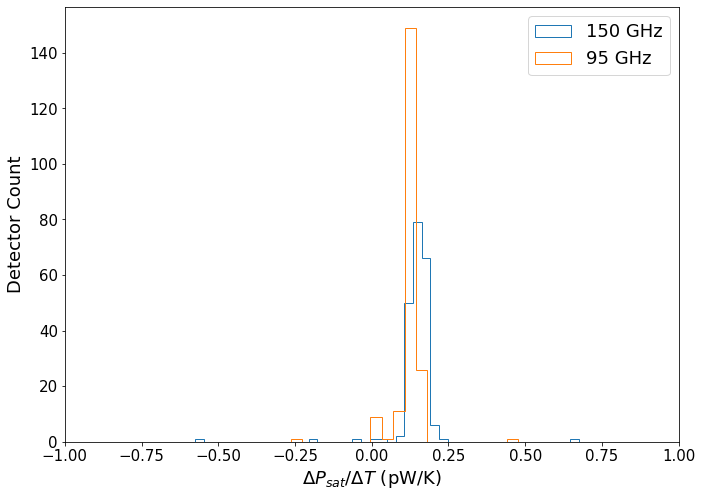

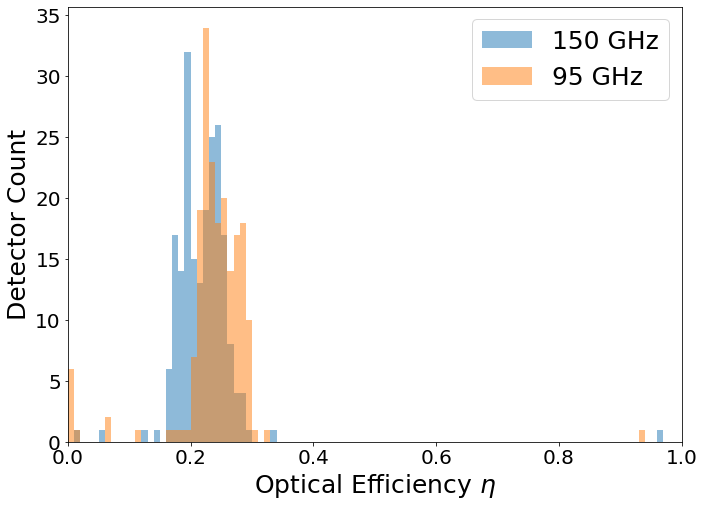

In [7]:
#Looking at 150 GHz channels only

%matplotlib inline

delta_T = 77-300

pbias_difference_95 = np.array([])
pbias_difference_150 = np.array([])

length_total = 0

for BL in [7,8,11,12]:
    for freq in [4250, 4750, 5250, 5750, 6250, 6750]:
        warm_datafile = glob.glob(f'./[!csv][!ipynb]*{freq}*{BL}*Warm*')
        cold_datafile = glob.glob(f'./[!csv][!ipynb]*{freq}*{BL}*Cold*')
        #print(warm_datafile)
        #print(cold_datafile)
        

        
        if len(warm_datafile) != 0 and len(cold_datafile) != 0:
            
            #print(warm_datafile)
            #print(cold_datafile)
            
            with open(warm_datafile[0], 'rb') as f:
                warm_data = pickle.load(f) 
            with open(cold_datafile[0], 'rb') as f:
                cold_data = pickle.load(f) 
             
            pbias_warm=dm.get_pbias(warm_data,0.9)
            pbias_cold=dm.get_pbias(cold_data,0.9)
            
            freq_pairs = match_freqs(warm_data['time series data']['channel freqs'],cold_data['time series data']['channel freqs'],dist=1e5)
            #print(freq_pairs)
            freq_pairs = freq_pairs[:int(len(freq_pairs)/2)]
            #print(f'len pairs: {len(freq_pairs)}')
            
                     
            for match in freq_pairs:
                if ~np.isnan(pbias_warm[match[0]]) and ~np.isnan(pbias_cold[match[1]]):
                    pbias_difference_150 = np.append(pbias_difference_150, pbias_warm[match[0]] - pbias_cold[match[1]]) 
                    length_total += 1

                    
for BL in [9,10]:
    for freq in [4250, 4750, 5250, 5750, 6250, 6750]:
        warm_datafile = glob.glob(f'./[!csv][!ipynb]*{freq}*{BL}*Warm*')
        cold_datafile = glob.glob(f'./[!csv][!ipynb]*{freq}*{BL}*Cold*')
        
        

        
        if len(warm_datafile) != 0 and len(cold_datafile) != 0:
            
            #print(warm_datafile)
            #print(cold_datafile)
            
            with open(warm_datafile[0], 'rb') as f:
                warm_data = pickle.load(f) 
            with open(cold_datafile[0], 'rb') as f:
                cold_data = pickle.load(f) 
             
            pbias_warm=dm.get_pbias(warm_data,0.9)
            pbias_cold=dm.get_pbias(cold_data,0.9)
            #print(pbias_warm)
            
            freq_pairs = match_freqs(warm_data['time series data']['channel freqs'],cold_data['time series data']['channel freqs'],dist=1e5)
            #print(freq_pairs)
                  
            freq_pairs = freq_pairs[:int(len(freq_pairs)/2)]
            #print(freq_pairs)
            
            #print(f'len pairs: {len(freq_pairs)}')
            #print(freq_pairs)
            for match in freq_pairs:
                if ~np.isnan(pbias_warm[match[0]]) and ~np.isnan(pbias_cold[match[1]]):
                    pbias_difference_95 = np.append(pbias_difference_95, pbias_warm[match[0]] - pbias_cold[match[1]]) 
                    #print(f'pbias_difference_95: {len(pbias_difference_95)}')
                    length_total += 1
                    
fig_full, ax_full = plt.subplots(1, figsize=(11,8))
fig_limited, ax_limited = plt.subplots(1, figsize=(11,8))
   
ax_full.hist(pbias_difference_150/delta_T,bins=100,histtype=u'step',label='150 GHz')
ax_full.hist(pbias_difference_95/delta_T,bins=100,histtype=u'step',label='95 GHz')
ax_full.set_ylabel('Detector Count',fontsize=18)
ax_full.set_xlabel('Δ$P_{sat}$/Δ$T$ (pW/Κ)',fontsize=18)
ax_full.tick_params(axis='both', which='major', labelsize=15)
ax_full.legend(fontsize=18)
print(np.average(pbias_difference_150/delta_T))

ax_limited.hist(pbias_difference_150/delta_T,bins=100,histtype=u'step',label='150 GHz')
ax_limited.hist(pbias_difference_95/delta_T,bins=100,histtype=u'step',label='95 GHz')
ax_limited.set_ylabel('Detector Count',fontsize=18)
ax_limited.set_xlabel('Δ$P_{sat}$/Δ$T$ (pW/Κ)',fontsize=18)
ax_limited.tick_params(axis='both', which='major', labelsize=15)
ax_limited.set_xlim([-1,1])
ax_limited.legend(fontsize=18)
fig_limited.savefig('../SPIE_2024_Figures/dpdT_estimate_rough.png',dpi=150)
print(np.average(pbias_difference_150/delta_T))

#taking into account the theoretical bandwidth of the 150 GHz detectors

print(len(pbias_difference_150))

dpdT_150 = pbias_difference_150/delta_T * 1e-12
dpdT_95 = pbias_difference_95/delta_T * 1e-12
bw_150 = 50e9
bw_95 = 37e9
kb = 1.38e-23

efficiency_estimate_150 = dpdT_150 * (1 / (kb * bw_150))
efficiency_estimate_95 = dpdT_95 * (1 / (kb * bw_95))

fig_eta, ax_eta = plt.subplots(1, figsize=(11,8))
ax_eta.hist(efficiency_estimate_150,bins=100,range=(0,1),alpha=0.5,label='150 GHz')
ax_eta.hist(efficiency_estimate_95,bins=100,range=(0,1),alpha=0.5,label='95 GHz')
ax_eta.set_xlim([0,1])
ax_eta.set_xlabel('Optical Efficiency $\eta$',fontsize=25)
ax_eta.set_ylabel('Detector Count',fontsize=25)
ax_eta.tick_params(axis='both', which='major', labelsize=20)
ax_eta.legend(fontsize=25)
fig_eta.savefig('../SPIE_2024_Figures/eta_estimate_rough.png',dpi=150)

#another thing I haven't corrected for is the fact that the cold load is not completely window filling

#rough correction for uncoated optics -- talk to Keith first

mean_150_eta = np.average(efficiency_estimate_150)
std_150_eta = np.std(efficiency_estimate_150)
mean_95_eta = np.average(efficiency_estimate_95)
std_95_eta = np.std(efficiency_estimate_95)
mean_eta = np.average(np.append(efficiency_estimate_150, efficiency_estimate_95))
std_eta = np.std(np.append(efficiency_estimate_150, efficiency_estimate_95))
print(f'mean 150 eta: {mean_150_eta} +- {std_150_eta}')
print(f'mean 95 eta: {mean_95_eta} +- {std_95_eta}')
print(f'mean eta: {mean_eta} +- {std_eta}')
print(len(efficiency_estimate_150)+len(efficiency_estimate_95))

print(length_total)

['./20240213_results_4750MHz_BL8_Warm.pkl', './20240213_results_4250MHz_BL11_Cold.pkl', './20240213_results_4250MHz_BL10_Cold.pkl', './20240213_results_4750MHz_BL7_Cold.pkl', './20240213_results_6750MHz_BL12_Warm.pkl', './20240213_results_5250MHz_BL9_Cold.pkl', './20240213_results_4750MHz_BL7_Warm.pkl', './20240213_results_5750MHz_BL8_Warm.pkl', './20240213_results_6250MHz_BL8_Warm.pkl', './20240213_results_4250MHz_BL11_Warm.pkl', './20240213_results_6750MHz_BL12_Cold.pkl', './20240213_results_5750MHz_BL11_Cold.pkl', './20240213_results_4750MHz_BL9_Warm.pkl', './20240213_results_5250MHz_BL12_Warm.pkl', './20240213_results_4750MHz_BL9_Cold.pkl', './20240213_results_5750MHz_BL8_Cold.pkl', './20240213_results_4750MHz_BL8_Cold.pkl', './20240213_results_5250MHz_BL12_Cold.pkl', './20240213_results_6250MHz_BL8_Cold.pkl', './20240213_results_4250MHz_BL10_Warm.pkl', './20240213_results_4250MHz_BL9_Cold.pkl', './20240213_results_4750MHz_BL11_Cold.pkl', './20240213_results_5250MHz_BL7_Warm.pkl', 

(0.0, 101.0)

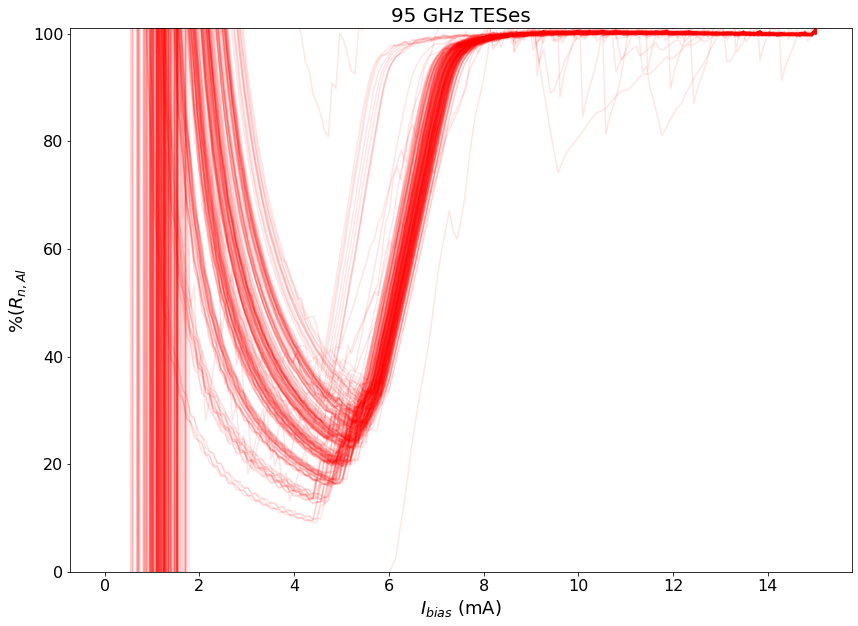

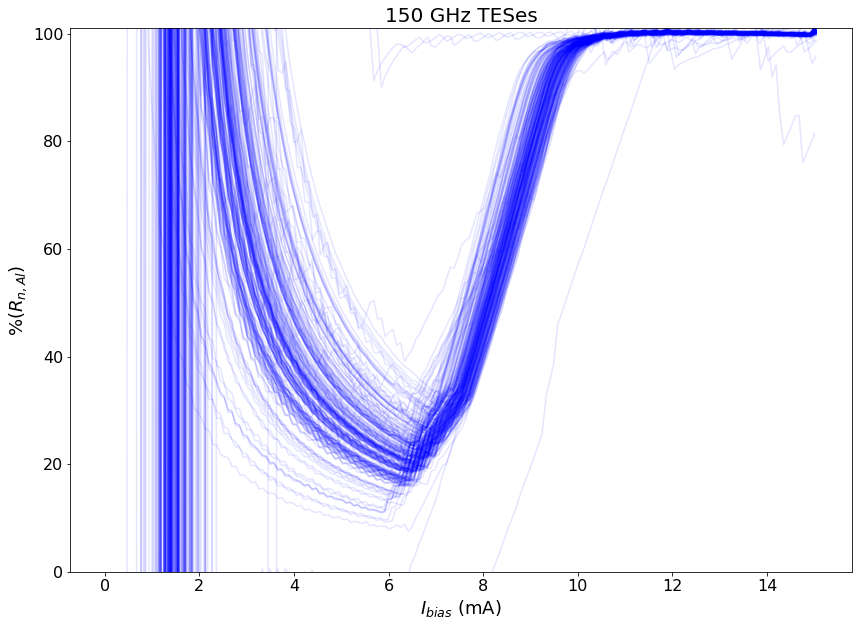

In [21]:
data_directory = 'name_of_directory' #it knows the parent directory, so you just need the 
                                     #specific directory name

datafiles = glob.glob('./[!bias][!ipynb]*')
print(datafiles)

fig_95, ax_95 = plt.subplots(1, figsize=(14, 10))
fig_150, ax_150 = plt.subplots(1, figsize=(14, 10))

cold_150 = 0
warm_150 = 0
cold_95 = 0
warm_95 = 0

for pickle_i in datafiles:
    print(pickle_i)
    temp = pickle_i.split('_')[-1].split('.')[0]
    ASU_BL = int(pickle_i.split('_')[-2].split('L')[1])
    
    print(temp, ASU_BL)
    
    with open(pickle_i, 'rb') as f:
        data_i = pickle.load(f) 
    
    if temp == "Cold" and np.in1d(ASU_BL, GHz150_lines)[0]:
        continue
        for ch in range(len(data_i['Vtes'])):
            if cold_150 == 0:
                ax_150.plot(data_i['Ibias'],data_i['bps'][ch]*100,'b',alpha=0.01,label = '77 K')
                cold_150 += 1
            else:
                ax_150.plot(data_i['Ibias'],data_i['bps'][ch]*100,'b',alpha=0.1)
        
            
    elif temp == "Warm" and np.in1d(ASU_BL, GHz150_lines)[0]:
        for ch in range(len(data_i['Vtes'])):
            if warm_150 == 0:
                ax_150.plot(data_i['Ibias'],data_i['bps'][ch]*100,'b',alpha=0.01,label = '300 K')
                warm_150 += 1
            else:
                ax_150.plot(data_i['Ibias'],data_i['bps'][ch]*100,'b',alpha=0.1)
        
        
    elif temp == "Cold" and np.in1d(ASU_BL, GHz95_lines)[0]:
        continue
        for ch in range(len(data_i['Vtes'])):
            if cold_95 == 0:
                ax_95.plot(data_i['Ibias'],data_i['bps'][ch]*100,'b',alpha=0.01,label = '77 K')
                cold_95 += 1
            else:
                ax_95.plot(data_i['Ibias'],data_i['bps'][ch]*100,'b',alpha=0.01)
        
            
    elif temp == "Warm" and np.in1d(ASU_BL, GHz95_lines)[0]:
        for ch in range(len(data_i['Vtes'])):
            if warm_95 == 0:
                ax_95.plot(data_i['Ibias'],data_i['bps'][ch]*100,'r',alpha=0.01,label = '300 K')
                warm_95 += 1
            else:
                ax_95.plot(data_i['Ibias'],data_i['bps'][ch]*100,'r',alpha=0.1)
        
        
ax_95.set_title('95 GHz TESes',fontsize=20)
ax_95.set_xlabel('$I_{bias}$ (mA)',fontsize=18)
ax_95.set_ylabel('$\%(R_{n,Al}$',fontsize=18)
#ax_95.legend(fontsize=18)
ax_95.tick_params(axis='both', which='major', labelsize=16)
ax_95.set_ylim([0,101])

ax_150.set_title('150 GHz TESes',fontsize=20)
ax_150.set_xlabel('$I_{bias}$ (mA)',fontsize=18)
ax_150.set_ylabel('$\%(R_{n,Al})$',fontsize=18)
#ax_150.legend(fontsize=18)
ax_150.tick_params(axis='both', which='major', labelsize=16)
ax_150.set_ylim([0,101])


In [ ]:
#other things are below 

In [22]:
#data_file = 'ts_toneinit_fcenter_4250.0_20240220142604_t_20240220150809.hd5'

data_file ='ts_toneinit_fcenter_4250.0_20240215160613_t_20240215180615.hd5'
result = dm.full_demod_process(data_file, f_sawtooth = 15)

%matplotlib qt

plt.figure(figsize=(14,10))

for ch in np.arange(1,10,1):#range(len(result['demod data'])):#[1]:#np.arange(0,50,1):#range(len(result_ts['demod data'])):
    plt.plot(result['demod t'], result['demod data'][ch],'-')
    
plt.xlabel('t (s)',fontsize=18)
plt.ylabel('$N(\Phi_0)$',fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)


    #plt.plot(result['demod t'], result_old_demod['demod data'][ch],'-',c='b')

using full_demod_process
4250.0
20240215160613
/home/matt/alicpt_data/tone_initializations/fcenter_4250.0_20240215160613/
num of channels: 1002
num of tones: 230
looking for delay region


/home/matt/readout/host/ali_offline_demod.py:1393: RuntimeWarning: divide by zero encountered in log10
  y=np.append(y,20*np.log10(np.abs(test_sweep[1,:])))


start = 4018292062.5000005
stop = 4028312570.3125005
delay: 3.2708813649242597e-08
shape_cals: (230, 3)
[ 3.09535001e+03+925.24485638j  1.71929296e+03  +0.j
 -2.34862556e+00  +0.j        ]
3.2552083333333246
n_phi0: 3.2552083333333246
start index: 25


  2%|▉                                          | 5/230 [00:00<00:05, 41.82it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


  7%|██▋                                       | 15/230 [00:00<00:04, 44.76it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


 11%|████▌                                     | 25/230 [00:00<00:04, 45.32it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


 15%|██████▍                                   | 35/230 [00:00<00:04, 45.35it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


 20%|████████▏                                 | 45/230 [00:01<00:04, 45.16it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


 24%|██████████                                | 55/230 [00:01<00:03, 45.21it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


 28%|███████████▊                              | 65/230 [00:01<00:03, 45.17it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


 33%|█████████████▋                            | 75/230 [00:01<00:03, 45.41it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


 37%|███████████████▌                          | 85/230 [00:01<00:03, 45.28it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


 41%|█████████████████▎                        | 95/230 [00:02<00:02, 45.16it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


 46%|██████████████████▋                      | 105/230 [00:02<00:02, 44.91it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


 50%|████████████████████▌                    | 115/230 [00:02<00:02, 44.95it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


 54%|██████████████████████▎                  | 125/230 [00:02<00:02, 44.80it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


 59%|████████████████████████                 | 135/230 [00:03<00:02, 44.54it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


 61%|████████████████████████▉                | 140/230 [00:03<00:02, 44.40it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


 65%|██████████████████████████▋              | 150/230 [00:03<00:01, 40.56it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


 70%|████████████████████████████▌            | 160/230 [00:03<00:01, 39.49it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


 73%|█████████████████████████████▉           | 168/230 [00:03<00:01, 38.38it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


 77%|███████████████████████████████▎         | 176/230 [00:04<00:01, 37.98it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


 80%|████████████████████████████████▉        | 185/230 [00:04<00:01, 39.43it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


 85%|██████████████████████████████████▊      | 195/230 [00:04<00:00, 42.46it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


 87%|███████████████████████████████████▋     | 200/230 [00:04<00:00, 41.36it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


 91%|█████████████████████████████████████▍   | 210/230 [00:04<00:00, 38.84it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


 95%|██████████████████████████████████████▊  | 218/230 [00:05<00:00, 37.52it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


 98%|████████████████████████████████████████▎| 226/230 [00:05<00:00, 38.32it/s]

shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


100%|█████████████████████████████████████████| 230/230 [00:05<00:00, 42.25it/s]


shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343
shape sig: (5368,)
len t: 5368
len t_fr_start: 5343
len sig_fr_start: 5343


In [ ]:
%matplotlib qt
for ch in range(0,30):#range(len(result['demod data'])):#[1]:#np.arange(0,50,1):#range(len(result_ts['demod data'])):
    plt.plot(result['demod t'], result['demod data'][ch],'-',c='r',label='vector')
    plt.plot(result['demod t'], result_old_demod['demod data'][ch],'-',c='b', label='no vec')



In [ ]:
data_file = 'ts_toneinit_fcenter_4250.0_20240220164846_t_20240220165737.hd5'

#data_file ='ts_toneinit_fcenter_4250.0_20240215160613_t_20240215180615.hd5'
result_ns = dm.full_demod_process(data_file, f_sawtooth = 15)

%matplotlib qt
for ch in range(len(result['demod data'])):#[1]:#np.arange(0,50,1):#range(len(result_ts['demod data'])):
    plt.plot(result_ns['demod t'], result_ns['demod data'][ch],'-',alpha=0.3)

In [ ]:
%matplotlib qt
for ch in range(200,230):#range(len(result['demod data'])):#[1]:#np.arange(0,50,1):#range(len(result_ts['demod data'])):
    plt.plot(result_ns['demod t'], result_ns['demod data'][ch],'-',c='r',alpha=0.2)

In [ ]:
result_ns['demod data'].shape